In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('Virat Kohli - One Day Internationals - Performance Analysis by Year - Sheet1.csv')

In [3]:
data

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2008,5,5,0,0,1,0,54,159,31.80,66.53,3,0
1,2009,10,8,2,1,2,0,107,325,54.17,84.42,4,0
2,2010,25,24,3,3,7,3,118,995,47.38,85.12,9,0
3,2011,34,34,5,4,8,2,117,1381,47.62,85.56,19,0
4,2012,17,17,2,5,3,1,183,1026,68.40,93.78,14,0
5,2013,34,30,6,4,7,3,115*,1268,52.83,97.54,11,0
6,2014,21,20,2,4,5,1,139*,1054,58.56,99.62,8,0
7,2015,20,20,3,2,1,0,138,623,36.65,80.60,11,0
8,2016,10,10,2,3,4,0,154*,739,92.38,100.00,6,0
9,2017,26,26,7,6,7,2,131,1460,76.84,99.12,9,0


In [4]:
df = data[['Year','Avg']]

In [7]:
df = df[:-1]

In [8]:
df

,Year,Avg
0,2008,31.80
1,2009,54.17
2,2010,47.38
3,2011,47.62
4,2012,68.40
5,2013,52.83
6,2014,58.56
7,2015,36.65
8,2016,92.38
9,2017,76.84


In [9]:
df.rename(columns={'Year': 'ds', 'Avg': 'y'}, inplace=True)

<ipython-input-9-d14831b0d0b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Year': 'ds', 'Avg': 'y'}, inplace=True)


In [10]:
df['ds']

0     2008
1     2009
2     2010
3     2011
4     2012
5     2013
6     2014
7     2015
8     2016
9     2017
10    2018
11    2019
12    2020
13    2021
14    2022
Name: ds, dtype: object

In [11]:
df['ds'] = pd.to_datetime(df['ds'])

<ipython-input-11-9502936a8f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [12]:
df

,ds,y
0,2008-01-01,31.80
1,2009-01-01,54.17
2,2010-01-01,47.38
3,2011-01-01,47.62
4,2012-01-01,68.40
5,2013-01-01,52.83
6,2014-01-01,58.56
7,2015-01-01,36.65
8,2016-01-01,92.38
9,2017-01-01,76.84


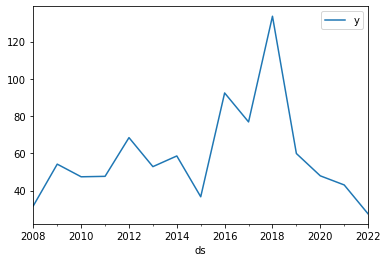

In [13]:
df.plot(x='ds')
plt.show()

In [14]:
# Initialize the Model
model=Prophet()

In [15]:
model.fit(df)

21:38:33 - cmdstanpy - INFO - Chain [1] start processing
21:38:33 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
df.tail()

,ds,y
10,2018-01-01,133.56
11,2019-01-01,59.87
12,2020-01-01,47.89
13,2021-01-01,43.00
14,2022-01-01,27.45


In [17]:
# Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [18]:
future_dates.tail()

,ds
375,2022-12-28
376,2022-12-29
377,2022-12-30
378,2022-12-31
379,2023-01-01


In [19]:
prediction=model.predict(future_dates)

In [24]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,2.351898,19.819027,83.196065,2.351898,2.351898,50.059271,50.059271,50.059271,50.059271,50.059271,50.059271,0.0,0.0,0.0,52.411170
1,2009-01-01,3.172726,21.970701,85.402056,3.172726,3.172726,50.838760,50.838760,50.838760,50.838760,50.838760,50.838760,0.0,0.0,0.0,54.011486
2,2010-01-01,3.991310,21.217171,85.606662,3.991310,3.991310,50.592925,50.592925,50.592925,50.592925,50.592925,50.592925,0.0,0.0,0.0,54.584235
3,2011-01-01,4.809895,22.318857,87.827280,4.809895,4.809895,50.332972,50.332972,50.332972,50.332972,50.332972,50.332972,0.0,0.0,0.0,55.142867
4,2012-01-01,5.628480,24.962957,89.175452,5.628480,5.628480,50.059271,50.059271,50.059271,50.059271,50.059271,50.059271,0.0,0.0,0.0,55.687751


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


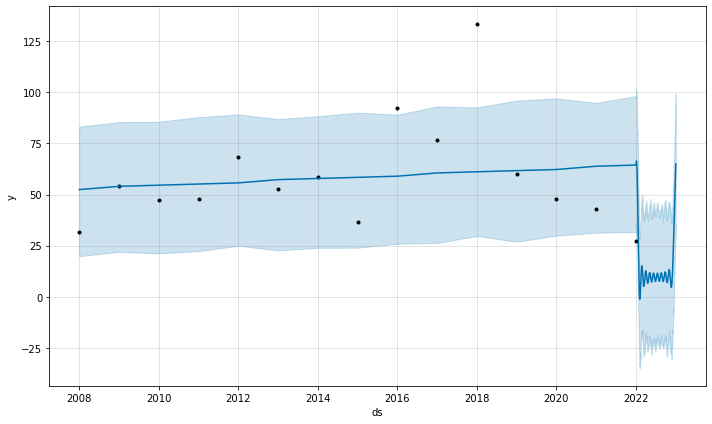

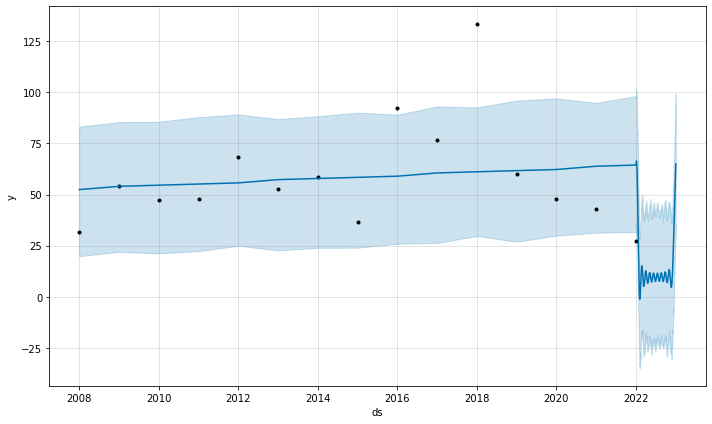

In [21]:
# plot the predicted projection
model.plot(prediction)

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


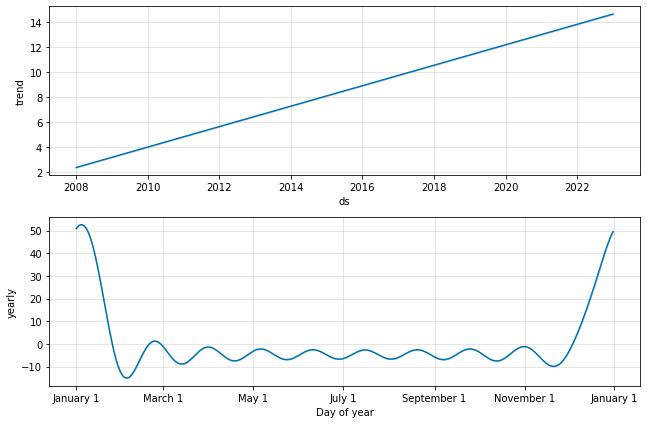

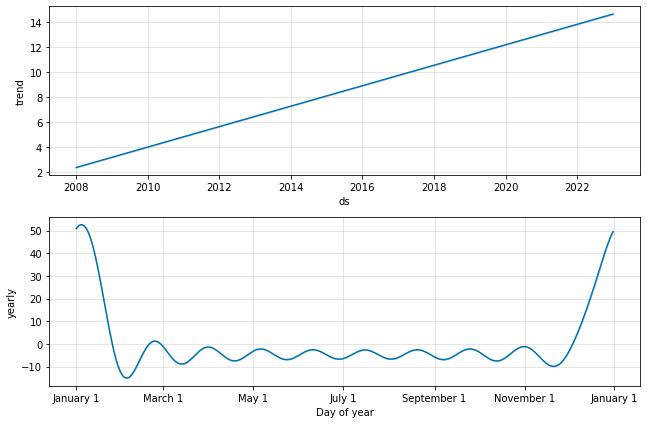

In [22]:
# Visualize Each Components[Trends,yearly]
model.plot_components(prediction)